# Project: Investigate a Dataset (TMDb_Movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue,cast,release year

#### Abbraviation of colume

 1.id - Unique id's for each row

2.imdb_id - System generated unique id

3.popularity - popularity score

4.budget - budget in dollars

5.revenue - revenue in dollars

6.original_title - Movie title

7.cast - cast performed in movie

8.homepage - website link of movie

9.director - director name

10.tagline - tagline of movie

11.keywords - words used to give significant idea

12.overview - general review of movie

13.runtime - movie duration in minutes

14.genres - categories of movie

15.production_companies - company name which manages a movie process from start to finish

16.release_date - movie releasing date

17.vote_count - votes given by viewers

18.vote_average - average votes given by viewers

19.release_year - movie releasing year

20.budget_adj-budget in 2010 dollars,accounting for inflation

21.revenue_adj -revenue in 2010 dollars,accounting for inflation




### We need to know from this dataset the answer of the following question:

1-Movies with largest and lowest budgets?

2-Movies which had most and least profit?

3-Movies with longest and shortest runtime values?

4-Movies with most and least earned revenue?

5-which year have a largest profit?

6-relation between profit and movie releasing year?

7-relation between profit and movie releasing year?

8-relation between profit and movie duration in minutes?



In [34]:
# Importing  librarie

import pandas as pd
import numpy as np
import csv
from datetime import datetime
import seaborn as sb 
import matplotlib.pyplot as plt
%matplotlib inline



In [35]:
#Read TMDb movie csv file
df = pd.read_csv('tmdb-movies.csv')


<a id='wrangling'></a>
## Data Wrangling

In this part of project I will do the following action:

1-check for cleanliness.

2-Delete unwanted columns

3-check and delete the duplication

4-Replacing zero with NAN in (budget , revenue ,runtime) column.

5-delete NAN in (budget , revenue ,runtime) column.

6-check the data type .

7-Changing the (budget and revneue and popularity) to integer Changing (release date) column into date format.

8-Add one colume profit of the each movie = (revenue-budget)


### 1-Check for Cleanliness

In [36]:
#1-check for cleanliness.  
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### 2-Delete unwanted columns

In [37]:
#Delet unwanted colume
df=df.drop(['cast', 'homepage', 'tagline', 'keywords', 'genres','overview', 'imdb_id','budget_adj','revenue_adj','id', 'overview' ,'vote_count', 'vote_average'], axis=1)
#previewing the new dataset
df.head(10)


,popularity,budget,revenue,original_title,director,runtime,production_companies,release_date,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015
5,9.110700,135000000,532950503,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,2015
6,8.654359,155000000,440603537,Terminator Genisys,Alan Taylor,125,Paramount Pictures|Skydance Productions,6/23/15,2015
7,7.667400,108000000,595380321,The Martian,Ridley Scott,141,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,2015
8,7.404165,74000000,1156730962,Minions,Kyle Balda|Pierre Coffin,91,Universal Pictures|Illumination Entertainment,6/17/15,2015
9,6.326804,175000000,853708609,Inside Out,Pete Docter,94,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,2015


### 3-Check and delete the duplication

In [38]:
#check the number of row befor delete the duplication raw
df.shape


(10866, 9)

In [39]:
#check the number of row befor delete the duplication raw
df.duplicated().sum()


1

In [40]:
#delete the duplication raw
df.drop_duplicates(inplace=True)

In [41]:
#check the number of row befor delete the duplication raw
df.shape

(10865, 9)

#### Note :one row is deleted

### 4-Replacing zero with NAN in (budget , revenue ,runtime) column

In [42]:
#check for zero values
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
runtime                    0
production_companies    1030
release_date               0
release_year               0
dtype: int64

In [43]:
df.fillna(0, inplace = True)

In [44]:
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
director                0
runtime                 0
production_companies    0
release_date            0
release_year            0
dtype: int64

In [45]:
# Replacing zero with NAN in (budget , revenue ) column.

df['budget'] = df['budget'].replace(0, np.NaN)
df['revenue'] = df['revenue'].replace(0, np.NaN)
df.dropna(inplace =True)

### 5-Delete NAN in (budget , revenue ,runtime) column.

In [46]:
df.dropna(inplace = True)
df.shape

(3854, 9)

### 6-Check the data type

In [47]:
df.dtypes

popularity              float64
budget                  float64
revenue                 float64
original_title           object
director                 object
runtime                   int64
production_companies     object
release_date             object
release_year              int64
dtype: object

### 7-Changing the (budget and revneue and popularity) to integer Changing (release date) column into date format

In [48]:
#Changing (Release_date) from string to datetime format, and change( budget and revneue and popularity) to integer
df['release_date'] = pd.to_datetime(df['release_date'])
df['budget'] = df['budget'].astype(int)
df['revenue'] = df['revenue'].astype(int)
df['popularity'] = df['popularity'].astype(int)

In [49]:
df.dtypes

popularity                       int64
budget                           int64
revenue                          int64
original_title                  object
director                        object
runtime                          int64
production_companies            object
release_date            datetime64[ns]
release_year                     int64
dtype: object

In [50]:
df.head(10)

,popularity,budget,revenue,original_title,director,runtime,production_companies,release_date,release_year
0,32,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015
1,28,150000000,378436354,Mad Max: Fury Road,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015
2,13,110000000,295238201,Insurgent,Robert Schwentke,119,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2015
3,11,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,2015
4,9,190000000,1506249360,Furious 7,James Wan,137,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2015
5,9,135000000,532950503,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,2015
6,8,155000000,440603537,Terminator Genisys,Alan Taylor,125,Paramount Pictures|Skydance Productions,2015-06-23,2015
7,7,108000000,595380321,The Martian,Ridley Scott,141,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,2015
8,7,74000000,1156730962,Minions,Kyle Balda|Pierre Coffin,91,Universal Pictures|Illumination Entertainment,2015-06-17,2015
9,6,175000000,853708609,Inside Out,Pete Docter,94,Walt Disney Pictures|Pixar Animation Studios|W...,2015-06-09,2015


### 8-Add one colume profit of the each movie = (revenue-budget)

In [51]:
#Add one colume profit of the each movie = (revenue-budget)
df['profit'] = df['revenue'] - df['budget']

#check the changes in the dataset
df.head(5)

,popularity,budget,revenue,original_title,director,runtime,production_companies,release_date,release_year,profit
0,32,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015,1363528810
1,28,150000000,378436354,Mad Max: Fury Road,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015,228436354
2,13,110000000,295238201,Insurgent,Robert Schwentke,119,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2015,185238201
3,11,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,2015,1868178225
4,9,190000000,1506249360,Furious 7,James Wan,137,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2015,1316249360


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Movies with largest and lowest budgets?)

In [52]:
from IPython.core.display import display

In [63]:
def mySortFunction(df,var):
    #sort
    sorted = df.sort_values([var], ascending = False)
    #get head and tail singel row
    sorted_head = sorted.head(1)
    sorted_tail = sorted.tail(1)
    #print and display
    ##movie name
    print(f'The Movie OF Highest value for {var} is :{sorted_head.original_title.values[0]}, with value {sorted_head[var].values[0]})')
    display(sorted_head.T)
    print(f'The Movie OF lowest value for {var} is :{sorted_tail.original_title.values[0]}, with value {sorted_tail[var].values[0]})')
    display(sorted_tail.T)

In [64]:
mySortFunction(df,'budget')

The Movie OF Highest value for budget is :The Warrior's Way, with value 425000000)


,2244
popularity,0
budget,425000000
revenue,11087569
original_title,The Warrior's Way
director,Sngmoo Lee
runtime,100
production_companies,Boram Entertainment Inc.
release_date,2010-12-02 00:00:00
release_year,2010
profit,-413912431


The Movie OF lowest value for budget is :Love, Wedding, Marriage, with value 1)


,3581
popularity,0
budget,1
revenue,1378
original_title,"Love, Wedding, Marriage"
director,Dermot Mulroney
runtime,90
production_companies,120dB Films|Scion Films|Voodoo Production Serv...
release_date,2011-06-03 00:00:00
release_year,2011
profit,1377


#### NOTE:(The Warrior's Way movie) is the largest budget 425000000 $

#### NOTE:(Love, Wedding, Marriage) is the lowest budget 1 $

### Research Question 2  (Movies which had most and least profit?)

In [65]:
# Sort the data by profit and show the top  rows.
mySortFunction(df,'profit')

The Movie OF Highest value for profit is :Avatar, with value 2544505847)


,1386
popularity,9
budget,237000000
revenue,2781505847
original_title,Avatar
director,James Cameron
runtime,162
production_companies,Ingenious Film Partners|Twentieth Century Fox ...
release_date,2009-12-10 00:00:00
release_year,2009
profit,2544505847


The Movie OF lowest value for profit is :The Warrior's Way, with value -413912431)


,2244
popularity,0
budget,425000000
revenue,11087569
original_title,The Warrior's Way
director,Sngmoo Lee
runtime,100
production_companies,Boram Entertainment Inc.
release_date,2010-12-02 00:00:00
release_year,2010
profit,-413912431


#### Note:(Avatar movie) Had most profit (2544505847 $)

#### Note:(The Warrior's Way) Had least profit (-413912431 $)

### Research Question 3 (Movies with longest and shortest runtime values?)

In [66]:
 #Sort the data by runtime and show the top  rows.
mySortFunction(df,'runtime')

The Movie OF Highest value for runtime is :Carlos, with value 338)


,2107
popularity,0
budget,18000000
revenue,871279
original_title,Carlos
director,Olivier Assayas
runtime,338
production_companies,Egoli Tossell Film AG|Canal+|Arte France|Films...
release_date,2010-05-19 00:00:00
release_year,2010
profit,-17128721


The Movie OF lowest value for runtime is :Kid's Story, with value 15)


,5162
popularity,0
budget,10
revenue,5
original_title,Kid's Story
director,Shinichiro Watanabe
runtime,15
production_companies,Studio 4Â°C
release_date,2003-06-02 00:00:00
release_year,2003
profit,-5


#### Note:Movies with longest runtime values is (Carlos movie) 338

#### Note:Movies with shortest runtime values is (Kid's Story) 15

### Research Question 4 (Movies with most and least earned revenue?)

In [67]:
# Sort the data by revenue and show the top  rows.
mySortFunction(df,'revenue')

The Movie OF Highest value for revenue is :Avatar, with value 2781505847)


,1386
popularity,9
budget,237000000
revenue,2781505847
original_title,Avatar
director,James Cameron
runtime,162
production_companies,Ingenious Film Partners|Twentieth Century Fox ...
release_date,2009-12-10 00:00:00
release_year,2009
profit,2544505847


The Movie OF lowest value for revenue is :Shattered Glass, with value 2)


,5067
popularity,0
budget,6000000
revenue,2
original_title,Shattered Glass
director,Billy Ray
runtime,94
production_companies,Lions Gate Films|Cruise/Wagner Productions|Bau...
release_date,2003-11-14 00:00:00
release_year,2003
profit,-5999998


#### Note:Movies with most revenue values is (Avatar) 2781505847 $

#### Movies with least revenue values is (Shattered Glass) 2 $

### Research Question 5 ( which year have a Highest and lowest profit? )

In [68]:
# Sort the data by profit and show the top  rows.
mySortFunction(df,'profit')

The Movie OF Highest value for profit is :Avatar, with value 2544505847)


,1386
popularity,9
budget,237000000
revenue,2781505847
original_title,Avatar
director,James Cameron
runtime,162
production_companies,Ingenious Film Partners|Twentieth Century Fox ...
release_date,2009-12-10 00:00:00
release_year,2009
profit,2544505847


The Movie OF lowest value for profit is :The Warrior's Way, with value -413912431)


,2244
popularity,0
budget,425000000
revenue,11087569
original_title,The Warrior's Way
director,Sngmoo Lee
runtime,100
production_companies,Boram Entertainment Inc.
release_date,2010-12-02 00:00:00
release_year,2010
profit,-413912431


#### NOTE: in (2009) we have a largest profit for (Avatar) movie

#### NOTE: in (2010) we have a lowest profit for (The Warrior's Way) movie

### Research Question 6 ( Movies with most and least popularity score? )

In [70]:
# Sort the data by popularity score and show the top  rows.
mySortFunction(df,'popularity')

The Movie OF Highest value for popularity is :Jurassic World, with value 32)


,0
popularity,32
budget,150000000
revenue,1513528810
original_title,Jurassic World
director,Colin Trevorrow
runtime,124
production_companies,Universal Studios|Amblin Entertainment|Legenda...
release_date,2015-06-09 00:00:00
release_year,2015
profit,1363528810


The Movie OF lowest value for popularity is :Fantastic Voyage, with value 0)


,10848
popularity,0
budget,5115000
revenue,12000000
original_title,Fantastic Voyage
director,Richard Fleischer
runtime,100
production_companies,Twentieth Century Fox Film Corporation
release_date,2066-08-24 00:00:00
release_year,1966
profit,6885000


#### NOTE: (Jurassic World) have the most popularity score 32

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5bef5c2090>,
      dtype=object)

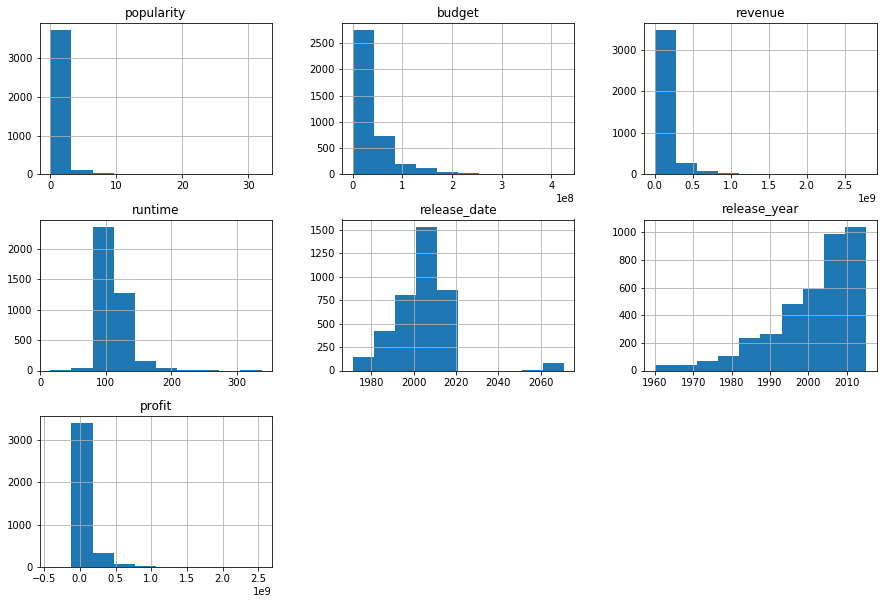

In [71]:
#plot histgram  
df.hist(figsize=(15,10))

In [73]:
#use floor division (lowest integer) to create 10 min intervals
df['runtime_10mins'] = df['runtime'].apply(lambda x: (x//10)*10)

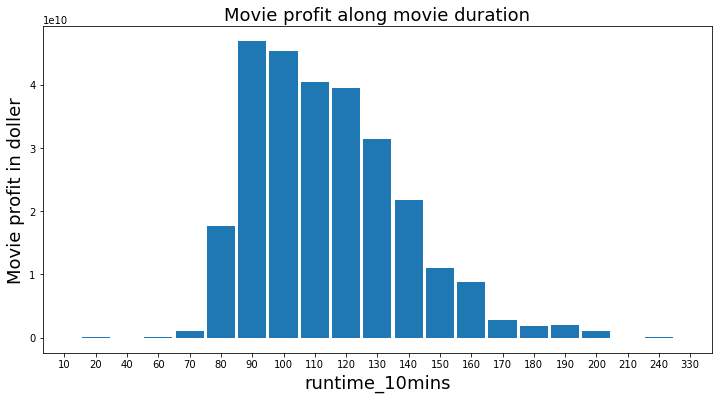

In [74]:
#creat bar plot for movie profit along run time
profits_year = df.groupby('runtime_10mins')['profit'].sum()
plt.xlabel('Movie duration in minutes', fontsize = 18)
plt.ylabel('Movie profit in doller', fontsize = 18)
plt.title('Movie profit along movie duration',fontsize = 18)
profits_year.plot.bar(figsize=(12,6),rot=0,width=0.9);

#### Note:Highest profit at the duration from 90:150 min

In [ ]:
# Create a plot for movie budget along runtime.

plt.subplots(figsize=(8, 5))
plt.scatter(df['runtime'], df['budget'])
plt.title('Movie budget along movie duration',fontsize=18)
plt.xlabel('Movie duration in minutes',fontsize=16)
plt.ylabel('Budget in doller',fontsize=16)
plt.grid(True)

#### Note:largest budget at the duration from 100:140 min

In [ ]:
# Create a plot for movie profit along release_year.
plt.subplots(figsize=(15, 5))
plt.bar(df['release_year'], df['profit'],color=['red'] )
plt.title('Movie profit along movie releasing year',fontsize=18)
plt.xlabel('Movie releasing year',fontsize=16)
plt.ylabel('Movie profit in doller',fontsize=16)
plt.grid(True)

In [ ]:
df

#### Note:the profit is increse along the years (largest profit in 2010)

<a id='conclusions'></a>
## Conclusions

> 1-(The Warrior's Way movie) is the largest budget 425000000 $

> 2-(Love, Wedding, Marriage) is the lowest budget 1 $

> 3-(Avatar movie) Had most profit (2544505847 $)

> 4-(The Warrior's Way) Had least profit (-413912431 $)

> 5-Movies with longest runtime values is (Carlos movie) 338 min

> 6-Movies with shortest runtime values is (Kid's Story) 15 min

> 7-Movies with most revenue values is (Avatar) 2781505847 $

> 8-Movies with least revenue values is (Shattered Glass) 2 $

> 9-in (2009) we have a largest profit for (Avatar) movied

> 10- in (2010) we have a lowest profit for (The Warrior's Way) movie

> 11 (Jurassic World) have the most popularity score 32

> 12-largest profit at the duration from 90:150 min

> 13-largest budget at the duration from 100:140 min

> 14-the profit is increse along the years (largest profit in 2010)



<a id='conclusions'></a>
## limitations



> 1-We have used TMBD Movies dataset for our analysis and worked with popularity, revenue and runtime. Our analysis is limited to only the provided dataset. For example, the dataset does not confirm that every release of every director is listed.

> 2-There is no normalization or exchange rate or currency conversion is considered during this analysis and our analysis is limited to the numerical values of revenue.

> 3-Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards the relationship being analyzed. 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])